Detected Text: INDIVIDUAL DE TRABAJO 47,
INFERIOR A UN ANO 2015

ERMINO Fri

VILMA LORENA PARADA SIERRA,

wmparta
en forma exclusiva al

, a
MIL TRESCIENTOS


Processed image saved as 'processed_image.png'


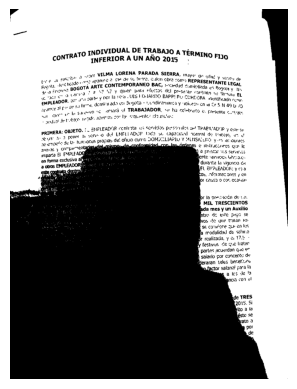

In [11]:
import cv2
import pytesseract
from pytesseract import Output
import matplotlib.pyplot as plt

# Specify the path to the Tesseract executable (update this if Tesseract is not in PATH)
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

def preprocess_image(image_path):
    # Load the image from the file path
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to binarize the image
    _, binary_image = cv2.threshold(gray_image, 150, 255, cv2.THRESH_BINARY)

    # Remove noise by applying a morphological operation (optional, for improving OCR accuracy)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
    denoised_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

    return denoised_image

def extract_text_from_image(image):
    # Use Tesseract to extract text from the image
    text = pytesseract.image_to_string(image)

    return text

def extract_text_with_details(image):
    # Get OCR data with bounding box information
    details = pytesseract.image_to_data(image, output_type=Output.DICT)

    for i in range(len(details['text'])):
        if int(details['conf'][i]) > 0:  # Only consider words with a confidence score greater than 0
            (x, y, w, h) = (details['left'][i], details['top'][i], details['width'][i], details['height'][i])
           

    return details

def display_image(image):
    # Convert image from BGR to RGB for displaying
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Display the image using matplotlib
    plt.imshow(rgb_image)
    plt.axis('off')  # Hide axis
    plt.show()

def main(image_path):
    # Preprocess the image to improve OCR accuracy
    processed_image = preprocess_image(image_path)

    # Extract and display text from the image
    extracted_text = extract_text_from_image(processed_image)
    print("Detected Text:", extracted_text)

    # Extract detailed OCR information (bounding boxes and confidence)
    extract_text_with_details(processed_image)

    # Save the processed image
    output_image_path = "processed_image.png"
    cv2.imwrite(output_image_path, processed_image)
    print(f"Processed image saved as '{output_image_path}'")

    # Display the processed image using matplotlib
    display_image(processed_image)

if __name__ == "__main__":
    # Path to the product image file
    image_path = r'C:\Users\DELL\Documents\smart_vision_project\ocr\images\0.jpg'  # Replace with the actual image path

    # Run the main function
    main(image_path)
